In [5]:
# To automatically reload modules defined in external files.
%reload_ext autoreload
%autoreload 2

# To display plots directly in the notebook:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# To make the notebook reproducible
seed = 42
np.random.seed(seed)

# Polynomial regression

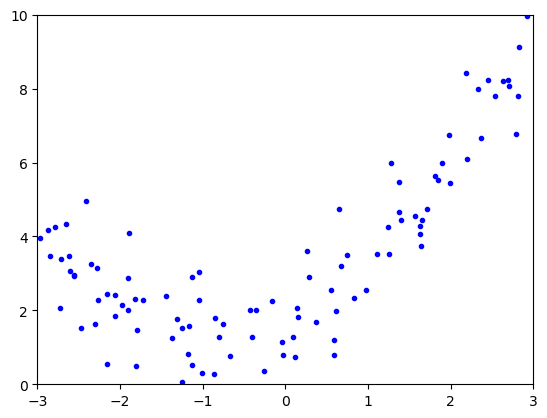

In [14]:
np.random.seed(seed)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)

plt.plot(X,y, 'b.')
plt.axis([-3,3,0,10])
plt.show()

#prøver å tilpasse en rett linje gjennom punktene.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

theta = [lin_reg.intercept_, lin_reg.coef_]

In [10]:
X_new = np.array([[-3], [3]]) # We choose two new x-values to create our predicted straight line
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, 'r')
plt.plot(X, y, 'b.')
plt.show()

NameError: name 'lin_reg' is not defined

..not very impressive. 

## Polynomial regression by hand

In [ ]:
X_square = np.dstack((X, X**2))
X_square = X_square[:,0,:] # This tweak is needed to make LinearRegression happy below

In [ ]:
X_square[:5]

In [ ]:
lin_reg_square = LinearRegression()
lin_reg_square.fit(X_square, y)

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
# Add squares:
X_new_square = np.dstack((X_new, X_new**2))
X_new_square = X_new_square[:,0,:]

In [ ]:
y_new = lin_reg_square.predict(X_new_square)

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()

In [ ]:
lin_reg_square.intercept_, lin_reg_square.coef_

det vi har gått gjennom så langt er hvordan vi kan bruke polynom regresjon til å få en linje gjennom punktene.
vi lagde denne polynom linjen for hånd/ kodet det, nå skal vi se på hvordan vi kan bruke scikit-learn til å gjøre det samme

## Using scikit-learn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X[:5]

In [ ]:
X_poly[:5] # Original feature of X and the square of it

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

In [ ]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.show()